# Regresión lineal con Sklearn 

In [34]:
# we need to install libs that are not included int the datascience kernel
pip install matplotlib seaborn

Keyring is skipped due to an exception: 'keyring.backends'
Note: you may need to restart the kernel to use updated packages.


In [58]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

%matplotlib inline

In [37]:
data = sklearn.datasets.load_boston()
raw_dataset = pd.DataFrame(data['data'], columns=data['feature_names'])
raw_dataset.loc[:, 'MEDV'] = data['target']
dataset = raw_dataset.copy()

In [38]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [39]:
dataset.shape

(506, 14)

### Dataset description

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information:

|Feature|Description|
|---|---| 
|CRIM |     per capita crime rate by town| 
|          ZN  |      proportion of residential land zoned for lots over 25,000 sq.ft.| 
|          INDUS |    proportion of non-retail business acres per town| 
|          CHAS  |    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)| 
|           NOX  |     nitric oxides concentration (parts per 10 million)| 
|           RM  |      average number of rooms per dwelling| 
|           AGE  |     proportion of owner-occupied units built prior to 1940| 
|           DIS  |     weighted distances to five Boston employment centres| 
|           RAD |      index of accessibility to radial highways| 
|          TAX  |     full-value property-tax rate per 10000 USD | 
|          PTRATIO|   pupil-teacher ratio by town| 
|           B    |     1000(Bk - 0.63)^2 where Bk is the proportion of black people by town| 
|           LSTAT |    % lower status of the population| 
|           MEDV  |    Median value of owner-occupied homes in $1000's| 




## División train y test

In [40]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [41]:
train_dataset.shape

(405, 14)

In [42]:
test_dataset.shape

(101, 14)

# Data exploration

In [43]:
import seaborn as sns

In [44]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000


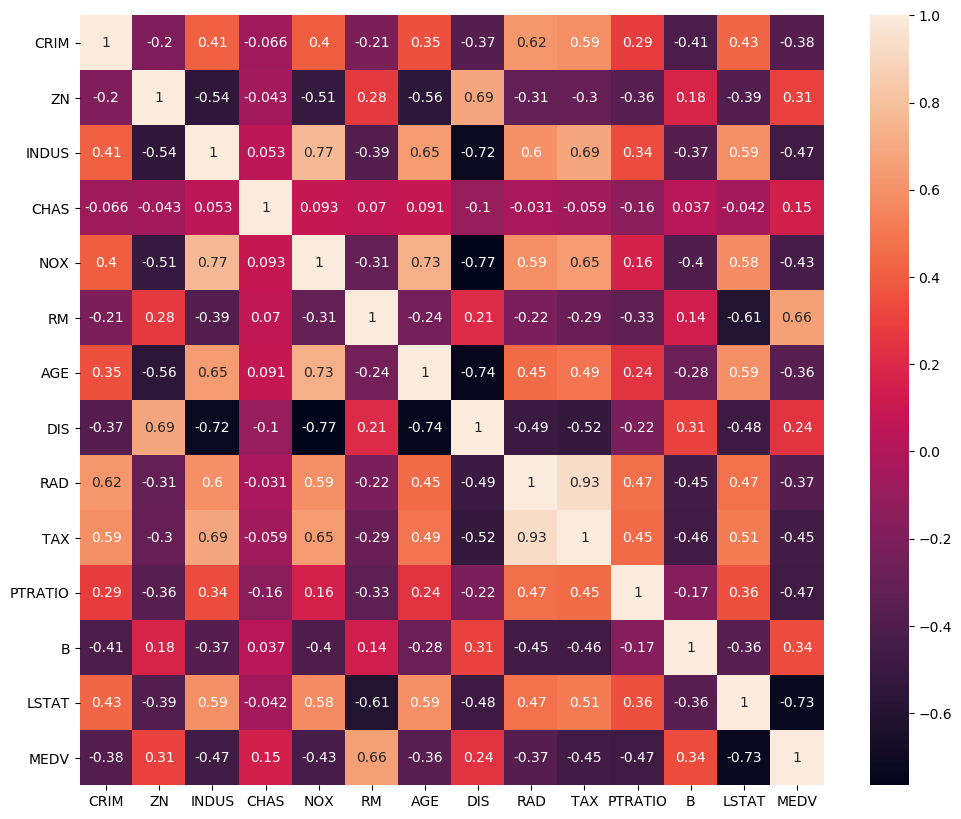

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(train_dataset.corr(), annot=True, ax=ax) 

# Data preprocessing

- Separar la etiqueta o valor a predecir de las features.

In [46]:
x_train = train_dataset.copy()
x_test = test_dataset.copy()

y_train = x_train.pop('MEDV')
y_test = x_test.pop('MEDV')

In [47]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(405, 13) (405,)
(101, 13) (101,)


Normalization

In [48]:
x_train.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.670339,8.977954
ZN,11.067901,22.688396
INDUS,11.097951,6.699157
CHAS,0.069136,0.253999
NOX,0.553098,0.115564
RM,6.269768,0.690552
AGE,68.241975,27.908527
DIS,3.834098,2.162173
RAD,9.474074,8.618564
TAX,405.839506,164.057951


- Es una buena práctica normalizar las features para que esten todas en el mismo rango.

In [49]:
train_mean = x_train.mean()
train_std = x_train.std()

x_train = (x_train - train_mean) / train_std
x_test = (x_test - train_mean) / train_std

In [50]:
x_train.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.347117e-16,1.0
ZN,-7.154771e-17,1.0
INDUS,2.113262e-15,1.0
CHAS,-2.165620e-17,1.0
NOX,-5.956826e-15,1.0
RM,5.359310e-15,1.0
AGE,-7.845576e-16,1.0
DIS,2.971560e-16,1.0
RAD,-8.498003e-17,1.0
TAX,2.439749e-16,1.0


# Linear Regression Model

In [52]:
# Create linear regression object
regr = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the training and testing sets
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [53]:
# The coefficients
coeff = pd.Series(regr.coef_, index=x_train.columns)
coeff

CRIM      -0.993792
ZN         0.943222
INDUS      0.071139
CHAS       0.490988
NOX       -2.061062
RM         2.270321
AGE        0.123447
DIS       -2.995038
RAD        3.166154
TAX       -2.525874
PTRATIO   -1.912666
B          0.800269
LSTAT     -3.919130
dtype: float64

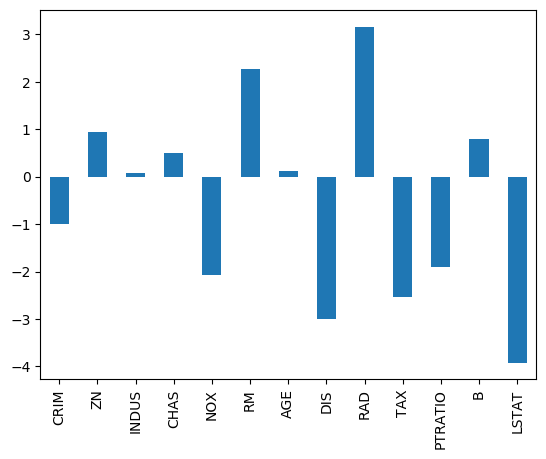

In [54]:
coeff.plot.bar()

In [55]:
mse_train =  sklearn.metrics.mean_squared_error(y_pred_train, y_train)
print(f"Mean squared error train: {mse_train}")
mse_test =  sklearn.metrics.mean_squared_error(y_pred_test, y_test)
print(f"Mean squared error test: {mse_test}")

Mean squared error train: 23.513263883668085
Mean squared error test: 16.573690392314713


(0, 60)

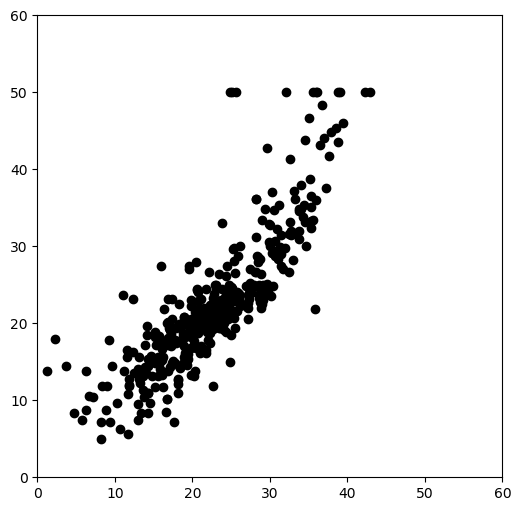

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
# Plot outputs
ax.scatter(y_pred_train, y_train, color="black")
ax.set_xlim([0, 60])
ax.set_ylim([0, 60])